### 500 HZ 70mVpp.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
import scipy
from scipy.optimize import curve_fit

#### load data

In [2]:
input_csv = "vidro-400Hz-250mBias1.csv"

df = pd.read_csv(input_csv, comment='#', names=['x', 'y', 'p', 't'])
df.head()

,x,y,p,t
0,676,221,0,5792
1,676,221,0,5792
2,676,221,0,5792
3,676,221,0,5792
4,676,221,0,5792


### Filter (small region just to calculate phase per pixel) and see the ROI


Number of data points: 244
            x    y  p        t
11968284  631  283  1  1010350
11968299  633  289  1  1010351
11968305  632  288  1  1010351
11968310  628  291  1  1010351
11968315  632  294  1  1010351
...       ...  ... ..      ...
11970432  629  215  1  1010399
11970433  632  215  1  1010399
11970443  631  212  1  1010400
11970455  633  221  1  1010400
11970467  630  218  1  1010400

[244 rows x 4 columns]
Time range: 1010350 to 1010400
Filtered data:
     x    y  p        t
0  631  283  1  1010350
1  633  289  1  1010351
2  632  288  1  1010351
3  628  291  1  1010351
4  632  294  1  1010351
Number of events: 244
Density array shape: (195608,)
Density indices shape: (244,)
Max density index: 133911
Min density index: 20383
Densities size: 195608
Density indices (first 10): [ 48608  50969  50577  51753  52929  34907  32947 117257 131369  94531]


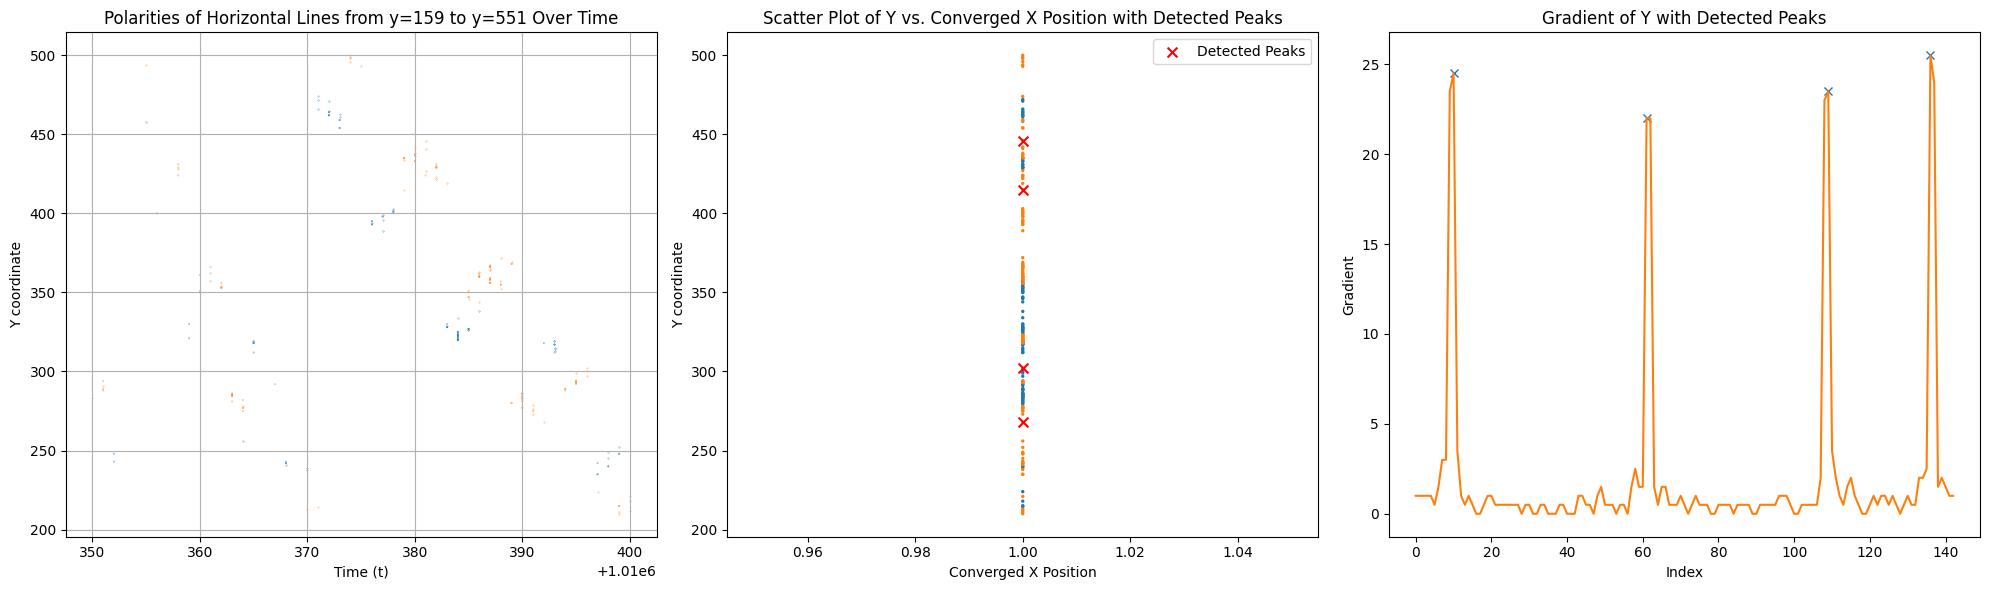

[268 302 415 446]


In [36]:
from polarityarea2 import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define the parameters
tmin = 1010350
tmax = 1010400
ymin = 159
ymax = 551
xmin = 628
xmax = 633
polarity = None

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()

# Sort the data based on y
x = line_df['x'].to_numpy()
y = line_df['y'].to_numpy()
t = line_df['t'].to_numpy()
p = line_df['p'].to_numpy()

idx = np.argsort(y)
x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

# Separate the data based on polarity
yp = y[p == 1]
yn = y[p == 0]

# Calculate the gradient of yp
gradyp = np.gradient(yp)

# Find peaks in the gradient of the y data for polarity = 1
peaksidx, _ = find_peaks(gradyp, distance=10, prominence=2)

# Create the ysplit and phisplit arrays
ysplit = yp[peaksidx]
phisplit = np.arange(0, 2 * np.pi * len(ysplit), 2 * np.pi)

# Create a subplot grid with 1 row and 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# First plot: Using plot_lines_polarity_over_time
plot_lines_polarity_over_time(input_csv, xmin, xmax, ymin, ymax, tmin, tmax, polarity, ax=ax1)

# Second plot: Scatter plot of y vs. position (converged x)
colors = ["C0", "C1"]
colors_vec = [colors[p] for p in line_df['p']]

# Set all x positions to the same value (e.g., 1) to align them vertically
converged_x = np.ones(len(t))
ax2.scatter(converged_x, y, s=2, c=colors_vec)

# Overlay the detected peaks on the scatter plot
ax2.scatter(converged_x[peaksidx], yp[peaksidx], s=50, c="red", marker="x", label="Detected Peaks")

# Configure labels and title for the second plot
ax2.set_xlabel('Converged X Position')
ax2.set_ylabel('Y coordinate')
ax2.set_title('Scatter Plot of Y vs. Converged X Position with Detected Peaks')
ax2.legend()

# Third plot: Gradient of y with peaks
ax3.plot(peaksidx, abs(gradyp[peaksidx]), "x")
ax3.plot(gradyp)
ax3.set_title('Gradient of Y with Detected Peaks')
ax3.set_xlabel('Index')
ax3.set_ylabel('Gradient')

plt.tight_layout()
plt.show()

print(ysplit)


In [37]:
phisplit

array([ 0.        ,  6.28318531, 12.56637061, 18.84955592])

[0.         0.18479957 0.36959914 0.5543987  0.73919827 0.92399784
 1.10879741 1.29359698 1.47839654 1.66319611 1.84799568 2.03279525
 2.21759481 2.40239438 2.58719395 2.77199352 2.95679309 3.14159265
 3.32639222 3.51119179 3.69599136 3.88079093 4.06559049 4.25039006
 4.43518963 4.6199892  4.80478876 4.98958833 5.1743879  5.35918747
 5.54398704 5.7287866  5.91358617 6.09838574 0.         0.05560341
 0.11120682 0.16681023 0.22241364 0.27801705 0.33362046 0.38922387
 0.44482728 0.50043069 0.5560341  0.61163751 0.66724092 0.72284433
 0.77844774 0.83405115 0.88965456 0.94525797 1.00086138 1.05646479
 1.1120682  1.16767161 1.22327502 1.27887843 1.33448184 1.39008524
 1.44568865 1.50129206 1.55689547 1.61249888 1.66810229 1.7237057
 1.77930911 1.83491252 1.89051593 1.94611934 2.00172275 2.05732616
 2.11292957 2.16853298 2.22413639 2.2797398  2.33534321 2.39094662
 2.44655003 2.50215344 2.55775685 2.61336026 2.66896367 2.72456708
 2.78017049 2.8357739  2.89137731 2.94698072 3.00258413 3.05818

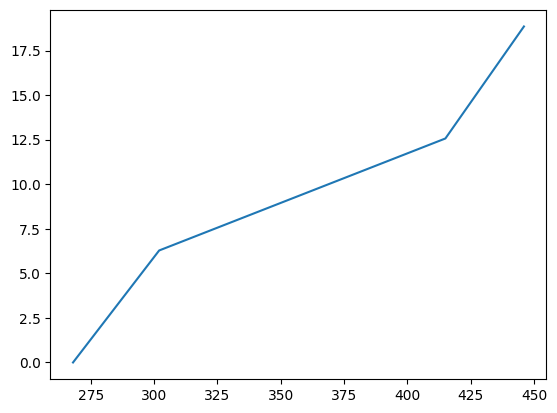

In [38]:
yroi = np.arange(ysplit[0], ysplit[-1] + 1)
phiroi = np.interp(yroi, ysplit, phisplit)
plt.plot(yroi, phiroi)
phiroi = np.mod(phiroi, 2 * np.pi) #between 0,2pi
print(phiroi)

### filter data (main data- bigger time period)

In [39]:
%matplotlib inline
# Define the parameters
tmin = 100000
tmax = 2000000
ymin = yroi[0]
ymax = yroi[-1]


# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 556722
            x    y  p        t
1120503   631  316  1   100009
1120673   631  393  0   100027
1120851   633  301  1   100044
1121180   630  299  1   100077
1121223   631  426  1   100082
...       ...  ... ..      ...
23752278  632  363  1  1999917
23752428  631  371  0  1999932
23752501  628  325  0  1999940
23752765  633  342  0  1999966
23752939  632  400  0  1999984

[556722 rows x 4 columns]
Time range: 100009 to 1999984


### phase per pixel method application

yp: [ 48  33  31 ... 156 111  95]
phase: [0.77844774 6.09838574 5.7287866  ... 1.82415057 4.28146255 3.391808  ]
303376
303376


(0.0, 5000.0)

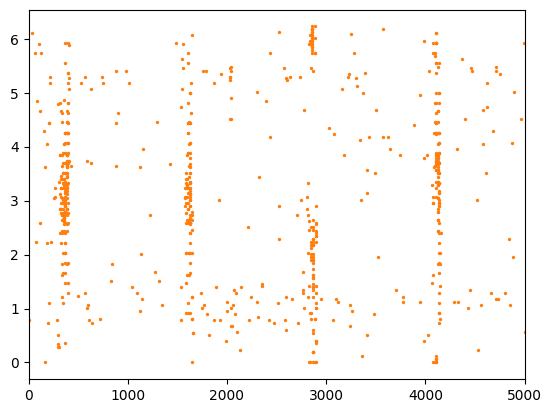

In [40]:

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
p = np.array(p)
t = np.array(t)

idx = np.argsort(t)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

t = t-t[0]

yp = y[p==1]
tp = t[p==1]
yn = y[p==0]

tp = tp-tp[0]

yp = yp-ymin

phase = np.array([phiroi[yi] for yi in yp])

print("yp:", yp)
#print("phiroi:", phiroi[180])
print("phase:", phase)
##yp = np.mod(yp, pixels_per_period)
#yp = np.mod(yp, 84)

tp_uniques = np.unique(tp)

##phase = yp*phaseperpixel
print(len(tp))
print(len(phase))
plt.scatter(tp, phase, s=2, c="C1")
plt.xlim(0,5000)

### Calculation of phase (centroids)

In [41]:
tp_uniques = np.unique(tp)
centroid_y = []
tval_vec = []

for i,tval in enumerate(tp_uniques):
    yval = phase[tp==tval]
    ycomplex = np.cos(yval)+1j*np.sin(yval)

    ymean = np.angle(np.mean(ycomplex))

    
    #print(i, ymean)
    centroid_y.append(ymean)
    tval_vec.append(tval)

    if i > 5500:
        break

centroid_y = np.array(centroid_y)
tval_vec = np.array(tval_vec)


In [42]:
centroid_y,tval_vec

(array([ 0.77844774, -0.18479957, -0.5543987 , ...,  1.84799568,
        -0.66724092,  1.50129206]),
 array([    0,    35,    68, ..., 65753, 65768, 65775], dtype=int64))

### phases of events over time

(0.0, 2000.0)

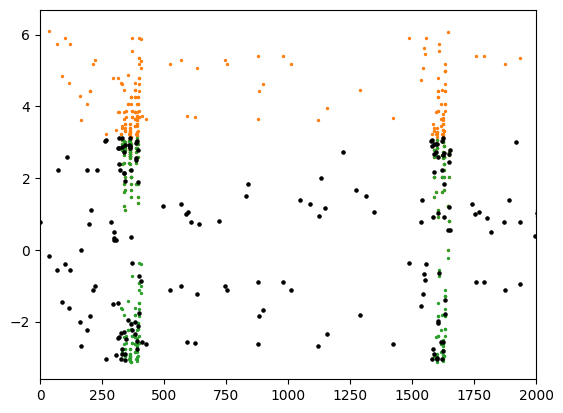

In [43]:
plt.scatter(tp, phase, s=2, c="C1")
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.xlim(0,2000)

### plot of the real and imaginary parts of complex numbers representing phase centroids

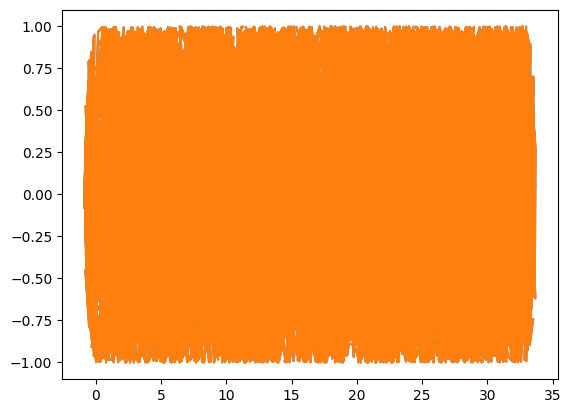

In [44]:
phase_complex = np.cos(centroid_y)+1j*np.sin(centroid_y)

#phase_complex = phase_complex[:100]

plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')
plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')


### Kalman filter to smooth the phase data derived from the centroid phases

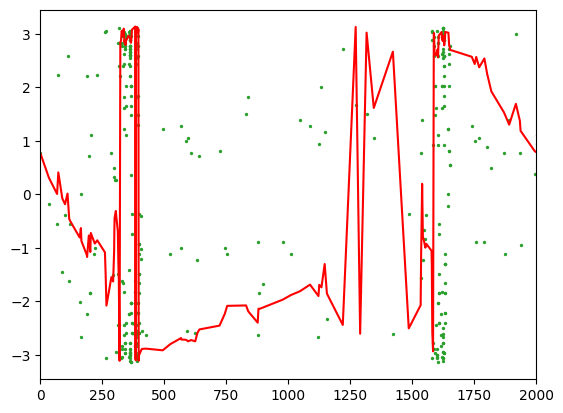

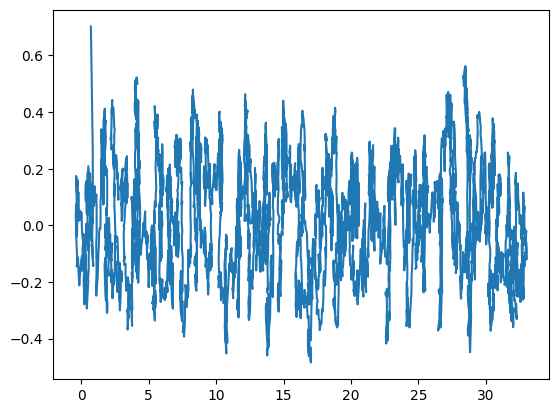

In [45]:
from kalman import KalmanTracking


Track = KalmanTracking()
Track.cov = 0.5 #Sets the initial covariance, representing the uncertainty in the initial state estimate.
Track.error_proc = 0.0001 #Sets the estimated process error, representing how much you expect the process to vary between steps.
Track.error_measurement = 0.03+0.03j #Sets the estimated measurement error, which includes both real and imaginary components.

complex_kalman = np.array([Track(c) for c in phase_complex])
phase_kalman = np.angle(complex_kalman)
#plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')
#plt.plot(phase_kalman.real+tval_vec/10000, phase_kalman.imag, '.')


plt.figure()
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
#plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.plot(tval_vec, phase_kalman, c="r")
plt.xlim(0,2000)

plt.figure()
plt.plot(complex_kalman.real+tval_vec/2000, complex_kalman.imag, '-')


12.32920740686788

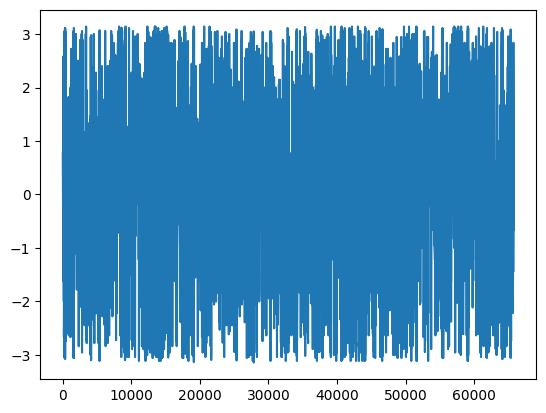

In [46]:
plt.plot(tval_vec, centroid_y)




np.ptp(np.diff(centroid_y)).max()


### Phase Unwrapping and Continuous Phase Analysis


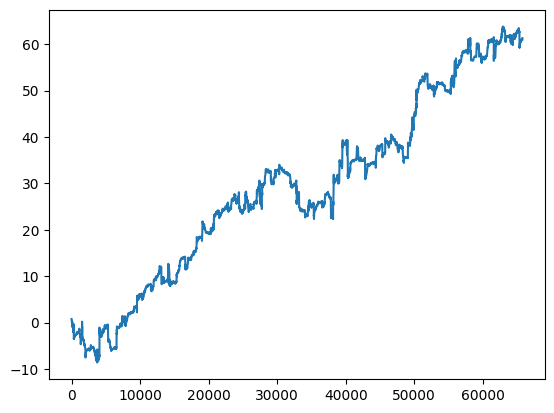

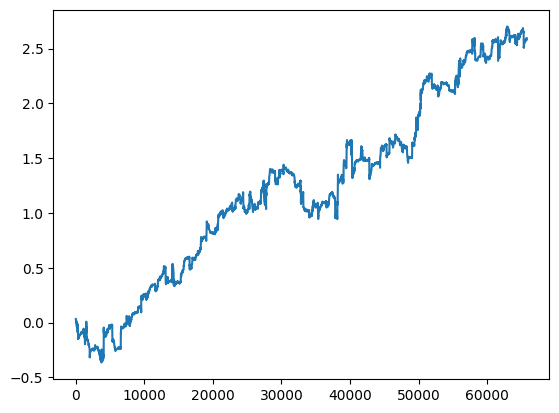

In [47]:
wavelength = 532e-9
centroid_y = np.unwrap(centroid_y)
centroid_y = np.unwrap(phase_kalman)

diff_phase = centroid_y - np.append([centroid_y[0]], np.diff(centroid_y))
plt.plot(tval_vec, centroid_y)
#plt.plot(tval_vec, diff_phase)
z = centroid_y/(2*np.pi)*wavelength/2

plt.figure()
plt.plot(tval_vec, z/1e-6)


### Displacement calc (nano)

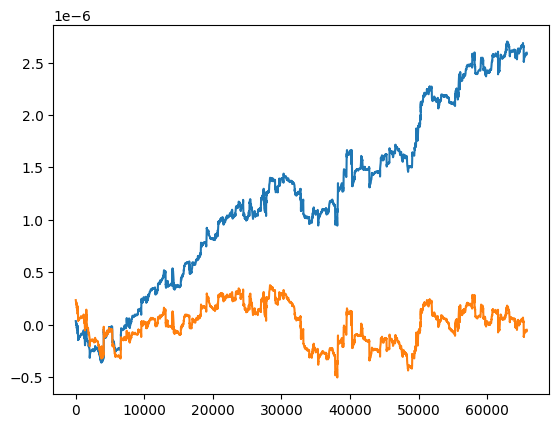

In [48]:
t_step = 1

t_interp = np.arange(tval_vec.min(), tval_vec.max(), t_step)
z_interp = np.interp(t_interp, tval_vec, z)

plt.plot(t_interp, z_interp)

z_detrend = scipy.signal.detrend(z_interp)
plt.plot(t_interp, z_detrend)


### FFT for finding main frequency of the signal

(0.0, 4000.0)

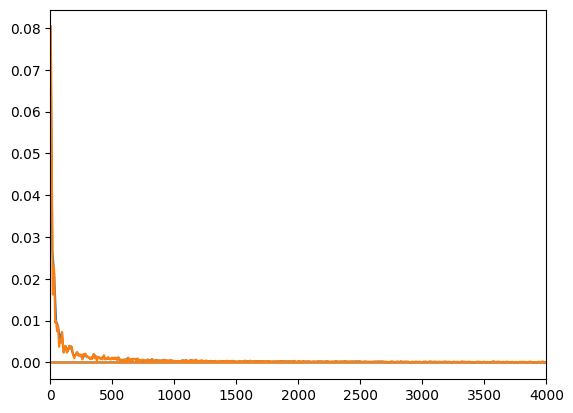

In [49]:
a = np.pad(z_interp, len(z_interp)*2)
a = np.pad(z_interp, 2**20-1)


ft = np.fft.fft(z_interp)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

ft = np.fft.fft(a)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

plt.xlim(0, 4000)

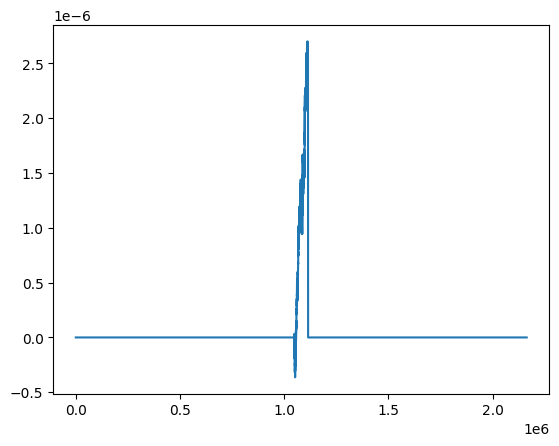

In [50]:
#a = np.pad(z_interp, len(z_interp)*2)

plt.plot(a)